In [12]:
import RapidML
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [13]:
digits = datasets.load_digits()
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [14]:
clf = MLPClassifier(alpha=1)
mclf = RapidML.rapid_udm_arr(data[:n_samples // 2], digits.target[:n_samples // 2], clf)


Using RapidML with User Defined Models and Arrays, Inputs will not be label encoded; note that the model provided by the user should be a Scikit_learn model and not a TPOT object.; Experimental, For Issues Contact Author: ritabratamaiti@hiretrex.com

Training....



C:\Users\Ritabrata Maiti\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
expected = digits.target[n_samples // 2:]
predicted = mclf.model.predict(data[n_samples // 2:])

In [16]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (mclf.model, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

          0       0.99      0.97      0.98        88
          1       0.95      0.92      0.94        91
          2       0.99      0.98      0.98        86
          3       0.96      0.85      0.90        91
          4       0.99      0.89      0.94        92
          5       0.93      0.96      0.94        91
          6       0.91      0.99      0.95        91
          7       0.95      0.99      0.97        89
          8       0.93      0.94      0.94        88
  

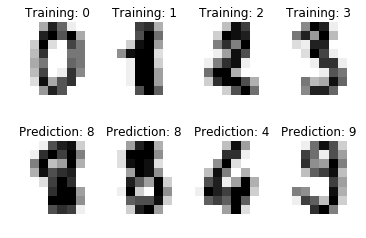

In [17]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()